# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [2]:
import cudf
import cuml
import numpy as np
import cupy as cp

## Create time series dataset

<AxesSubplot:>

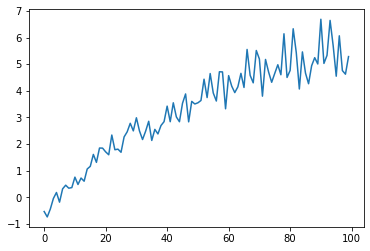

In [34]:
X = cuml.make_arima(
    batch_size=10
    , n_obs=100
    , order=(2,1,2)
    , seasonal_order=(0,1,2,12)
    , output_type='cudf'
    , random_state=np.random.randint(1e9)
)
X.head()

X.loc[:, 0].to_pandas().plot(kind='line')

---

# Time series models

---

#### ExponentialSmoothing()

In [37]:
exp_smooth = cuml.ExponentialSmoothing(
    X
    , seasonal='mul'
    , seasonal_periods=2
    , ts_num=10
)

In [38]:
exp_smooth.fit()

ExponentialSmoothing(endog=           0          1          2         3          4         5          6  \
0  -0.528955   0.856662   0.623688 -0.834912  -0.359821  0.667709   0.094560   
1  -0.731405   0.480154   0.178912 -0.995248  -0.268154  0.390650   0.180733   
2  -0.436427   0.347709   0.669860 -1.405302  -0.247523  0.772453   0.028152   
3  -0.039089  -0.081348   0.768245 -1.349597  -0.060086  0.425723   0.090540   
4   0.185112   0.408135   1.208106 -1.067853  -0.140041  0.136542   0.493428   
..       ...        ...        ...       ...        ...       ...        ...   
95  4.549237 -10.412668  20.521038 -1.964015 -16.160708 -4.326994  40.164858   
96  6.065380 -10.850583  20.249185 -2.474305 -16.608987 -3.271060  41.293228   
97  4.760405 -12.475890  20.688530 -2.155412 -18.318576 -2.733759  42.523641   
98  4.625071 -11.802879  21.824321 -2.739758 -16.929423 -2.070373  42.845222   
99  5.285441 -13.226861  21.704771 -2.265367 -17.795128 -3.432704  44.420189   

            

<AxesSubplot:>

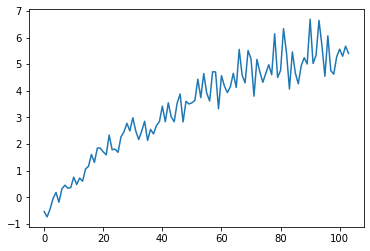

In [39]:
cudf.concat([X, exp_smooth.forecast(4)]).reset_index().loc[:,0].to_pandas().plot(kind='line')

In [40]:
exp_smooth.get_level()

,0,1,2,3,4,5,6,7,8,9
0,-0.584131,0.424754,0.418061,-1.219768,-0.240879,0.570757,0.095125,-0.301082,-0.421632,-0.619096
1,-0.330982,0.014215,0.673318,-1.459181,-0.096658,0.609734,0.055046,-0.643944,-0.123939,-0.432141
2,-0.079130,-0.005261,0.835609,-1.235512,-0.092694,0.430962,0.823988,-0.557299,0.030425,-0.247602
3,0.063072,-0.175280,1.112929,-1.282794,-0.524942,0.163898,0.496007,-0.452263,-0.215295,-0.145245
4,1.091358,-0.233302,1.227712,-1.139208,-0.298972,0.018103,0.318288,-0.425484,0.291978,-0.297301
...,...,...,...,...,...,...,...,...,...,...
93,19.232320,1.827407,17.700876,-2.394139,-13.085450,0.008264,-172.209405,-47.040681,5.758731,2.897219
94,19.557847,2.053905,17.854499,-2.540474,-13.656392,0.007866,-175.382921,-49.252696,5.774699,3.094766
95,19.328600,2.208978,18.029609,-2.583173,-14.497600,0.007080,-180.526324,-51.925735,5.721183,3.241302
96,18.837979,2.389858,18.313491,-2.780384,-14.228715,0.005942,-182.693464,-54.013751,5.495446,3.400730


In [41]:
exp_smooth.get_season()

,0,1,2,3,4,5,6,7,8,9
0,0.888347,1.143813,1.513995,1.091671,1.073505,1.316551,0.341232,1.613453,1.143177,1.009035
1,0.820349,0.202353,0.768076,0.926106,0.743357,0.698927,1.633765,0.570154,0.546641,0.867143
2,0.059766,-6.311505,1.488108,1.039182,1.301804,1.016636,0.449944,1.178943,-0.360230,0.856690
3,-0.111448,0.195102,0.994280,0.911453,0.917103,0.236448,1.268143,0.427341,1.074879,0.931769
4,0.120210,-5.882477,1.269204,0.999981,1.119398,-0.181990,0.372602,1.056459,-0.598610,1.208443
...,...,...,...,...,...,...,...,...,...,...
93,0.277896,-5.462745,1.162514,0.834690,1.236426,-460.752643,-0.232898,-0.264212,-2.028621,-1.940583
94,0.302510,-4.784487,1.151761,0.956394,1.207527,-449.219371,-0.234994,-0.265942,-1.984012,-1.986986
95,0.269782,-5.480271,1.156807,0.834624,1.250592,-438.356918,-0.234019,-0.267729,-2.006142,-1.947052
96,0.287880,-4.799095,1.166921,0.963088,1.198276,-418.989135,-0.234794,-0.267033,-1.940012,-1.994794


In [42]:
exp_smooth.get_trend()

,0,1,2,3,4,5,6,7,8,9
0,0.196211,-0.308847,0.159301,-0.243893,0.082807,0.039572,-0.040920,-0.207563,0.219961,0.064798
1,0.196211,-0.344865,0.167112,-0.243542,0.086510,0.039394,-0.040863,-0.248169,0.243281,0.101472
2,0.196211,-0.229616,0.166720,-0.206911,0.081533,-0.026060,0.014441,-0.147684,0.216606,0.126410
3,0.196211,-0.208507,0.175724,-0.194396,0.050553,-0.098365,-0.008944,-0.071837,0.077908,0.119189
4,0.196211,-0.155206,0.170763,-0.167897,0.061130,-0.112595,-0.020470,-0.042240,0.206717,0.037756
...,...,...,...,...,...,...,...,...,...,...
93,0.196211,0.011763,0.209530,-0.035621,-0.118383,0.000141,-2.411749,-0.667433,0.117957,0.090342
94,0.196211,0.087820,0.204978,-0.044301,-0.145671,-0.000021,-2.463772,-1.130998,0.087360,0.122527
95,0.196211,0.111640,0.202547,-0.044175,-0.187611,-0.000250,-2.646770,-1.593800,0.045097,0.129735
96,0.196211,0.136164,0.209168,-0.056174,-0.160085,-0.000517,-2.614015,-1.742126,-0.036153,0.138649


In [43]:
exp_smooth.score()

0     30.783035
1    201.047627
2     13.871181
3     13.016742
4     18.935750
5     76.311065
6     71.110978
7     42.139650
8    388.247533
9     26.511099
dtype: float64

#### tsa.ARIMA()

In [46]:
arima = cuml.ARIMA(X, (2,1,2), (0,1,2,12), fit_intercept=False)

In [47]:
arima.fit()

ARIMA(order={'p': 2, 'd': 1, 'q': 2, 'P': 0, 'D': 1, 'Q': 2, 's': 12, 'k': 0}, simple_differencing=True, handle=<cuml.raft.common.handle.Handle object at 0x7f767eda0cf0>, verbose=4, output_type='cudf')

In [48]:
arima.forecast(4)

,0,1,2,3,4,5,6,7,8,9
0,5.336670,-11.978958,21.686263,-2.093637,-17.863337,-4.562479,46.343510,14.355285,-9.422803,-7.091929
1,5.316094,-12.717283,22.642628,-1.829358,-17.928530,-3.805866,46.542250,14.367855,-10.168914,-6.888173
2,7.004390,-11.024117,22.742956,-2.226295,-17.277246,-2.785527,45.756442,14.338366,-9.847722,-7.369686
3,5.085304,-11.067745,22.758828,-1.904012,-17.790752,-1.509657,45.503797,13.765334,-11.023478,-7.945732


<AxesSubplot:>

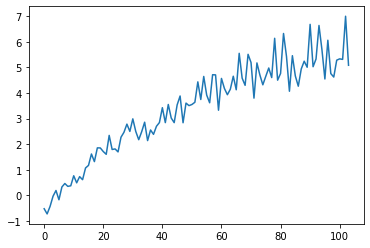

In [49]:
cudf.concat([X, arima.forecast(4)]).reset_index().loc[:,0].to_pandas().plot(kind='line')

[W] [05:44:08.740831] WARNING(`predict`): predictions before 13 are undefined, will be set to NaN


<AxesSubplot:>

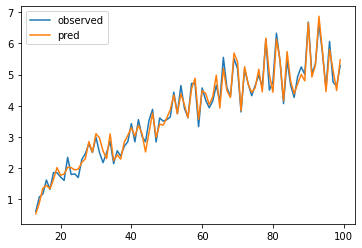

In [61]:
df = X.loc[:,0].to_frame(name='observed')
df['pred'] = arima.predict(0, 100).loc[:,0]
df.loc[13:].to_pandas().plot(kind='line')

#### tsa.auto_arima.AutoARIMA()